# Air Pollution and Traffic Levels in Westminster, London

This is the final project for the Coursera course Applied Plotting, Charting & Data Representation in Python run by the University of Michigan

I will be investigating the relationship between **Air Quality** and **Traffic Levels** in **Westminster, London, UK** in the 10 years of 2010 - 2019.

As a side project, I will investigate if air quality in Westminster improved during the Covid-19 lockdowns in 2020 and 2021 (unfortunately traffic levels for this time period is not yet available).

The data can be downloaded from:

- **Traffic Data**
    - https://roadtraffic.dft.gov.uk/local-authorities/109
    - this is the specific file: https://dft-statistics.s3.amazonaws.com/road-traffic/downloads/rawcount/local_authority_id/dft_rawcount_local_authority_id_109.csv
    
- **Air Quality Data**
    - https://uk-air.defra.gov.uk/data/flat_files?site_id=HORS
    - the files for the different years need to be downloaded individually


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

## Traffic Data

This is the number of vehicles counted at several counting points around Westminster.

I've added up all the different counting stations for each date and then taken a mean for the year.

In [2]:
traffic = pd.read_csv('https://raw.githubusercontent.com/RatatoskRagnarok/michigan_data_science/master/applied_plotting_final_project/data/dft_rawcount_local_authority_id_109.csv')
traffic = pd.DataFrame(traffic.groupby('count_date')['all_motor_vehicles'].sum())  # adding up all the different count stations

traffic.index = pd.to_datetime(traffic.index)
traffic = traffic.loc['2010-01-01':]
traffic = pd.DataFrame(traffic.groupby(pd.Grouper(freq='A'))['all_motor_vehicles'].mean())  # taking a mean count for each year
traffic

,all_motor_vehicles
count_date,
2010-12-31,22139.090909
2011-12-31,20046.909091
2012-12-31,20472.416667
2013-12-31,18787.689655
2014-12-31,24588.923077
2015-12-31,20766.880000
2016-12-31,13951.555556
2017-12-31,11676.272727
2018-12-31,11558.676471


## Air Pollution Data

The only pollutants available for all 10 years are Nitric Oxide (NO) and Nitrogen dioxide (NO<sub>2</sub>).
These are collected together in Nitrogen oxides as nitrogen dioxde, or NO<sub>x</sub>

The units for this are micrograms (one-millionth of a gram) per cubic meter air ($μg/m^3$)

In [3]:
years = range(10, 20)
airs = []
for year in years:
    air = pd.read_csv(f'https://raw.githubusercontent.com/RatatoskRagnarok/michigan_data_science/master/applied_plotting_final_project/data/HORS_20{year}.csv', skiprows=4)
    air = air[['Date', 'time', 'Nitrogen oxides as nitrogen dioxide']]
    air = pd.DataFrame(air.groupby('Date')['Nitrogen oxides as nitrogen dioxide'].mean())  # getting a mean for each day
    airs.append(air)
    
air_pol = pd.concat(airs)
air_pol.index = pd.to_datetime(air_pol.index)
air_pol = pd.DataFrame(air_pol.groupby(pd.Grouper(freq='A'))['Nitrogen oxides as nitrogen dioxide'].mean())  # getting a mean for each year
air_pol

,Nitrogen oxides as nitrogen dioxide
Date,
2010-12-31,79.994254
2011-12-31,64.937417
2012-12-31,68.800383
2013-12-31,77.231634
2014-12-31,74.464486
2015-12-31,63.295237
2016-12-31,57.939475
2017-12-31,52.970493
2018-12-31,48.565387


## Adding that into one dataframe

In [4]:
df = pd.merge(air_pol, traffic, left_index=True, right_index=True, how='outer')
df['year'] = df.index.year
df.columns = ['NOx ($μg/m^3$)', 'Number of cars', 'Year']
df

,NOx ($μg/m^3$),Number of cars,Year
Date,,,
2010-12-31,79.994254,22139.090909,2010
2011-12-31,64.937417,20046.909091,2011
2012-12-31,68.800383,20472.416667,2012
2013-12-31,77.231634,18787.689655,2013
2014-12-31,74.464486,24588.923077,2014
2015-12-31,63.295237,20766.880000,2015
2016-12-31,57.939475,13951.555556,2016
2017-12-31,52.970493,11676.272727,2017
2018-12-31,48.565387,11558.676471,2018


## Making a chart


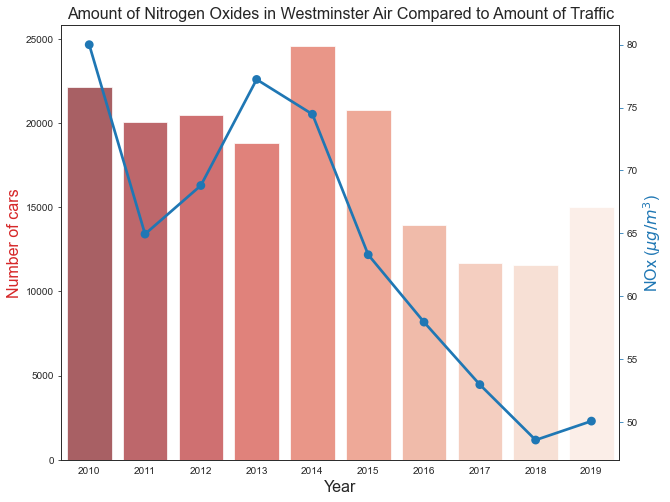

In [5]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,8))
color = 'tab:red'
#bar plot creation
ax1.set_title('Amount of Nitrogen Oxides in Westminster Air Compared to Amount of Traffic', fontsize=16)
ax1.set_xlabel(xlabel='Year', fontsize=16)
ax1.set_ylabel(ylabel='Number of cars', fontsize=16, color=color)
ax1 = sns.barplot(x=df['Year'], y='Number of cars', data = df, palette="Reds_r", alpha=0.7, color=color)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
#line plot creation
ax2.set_ylabel('NOx ($μg/m^3$)', fontsize=16, color=color)
ax2 = sns.pointplot(x=df['Year'], y='NOx ($μg/m^3$)', data = df, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

It does look like there is a link between traffic levels and the amount of NO<sub>x</sub> in the air of Westminster over the 10 year period, but NO<sub>x</sub> levels are falling faster than traffic levels, suggesting cars are also getting better at not releasing so much into the atmosphere.

## Side project: Has air quality improved during lockdown?

Just looking at the data from 2019 to March 2021.

For this period I have data for both NO<sub>x</sub> and fine particulates.

I'm going with monthly means this time.

In [6]:
years = range(19, 22)
airs = []
for year in years:
    air = pd.read_csv(f'https://raw.githubusercontent.com/RatatoskRagnarok/michigan_data_science/master/applied_plotting_final_project/data/HORS_20{year}.csv', skiprows=4)
    air = air[['Date', 'time', 'Nitrogen oxides as nitrogen dioxide', 'PM<sub>2.5</sub> particulate matter (Hourly measured)']]
    air = pd.DataFrame(air.groupby('Date').mean())  # getting a mean for each day
    airs.append(air)
    
air_pol = pd.concat(airs)
air_pol.index = pd.to_datetime(air_pol.index)
air_pol = pd.DataFrame(air_pol.groupby(pd.Grouper(freq='M')).mean())  # getting a mean for each month
air_pol = air_pol.loc[:'2021-03-29']
air_pol

,Nitrogen oxides as nitrogen dioxide,PM<sub>2.5</sub> particulate matter (Hourly measured)
Date,,
2019-01-31,69.398819,13.002778
2019-02-28,82.400537,18.694178
2019-03-31,49.276517,11.983988
2019-04-30,62.292260,18.547947
2019-05-31,51.356935,10.580564
2019-06-30,36.143147,9.798653
2019-07-31,28.861154,10.688293
2019-08-31,34.095329,10.459886
2019-09-30,36.385330,10.387209


### N.B. 

This code won't run on the coursera system which is using a much older version of seaborn.

If you want to see it properly, it's available at:
https://github.com/RatatoskRagnarok/michigan_data_science/blob/master/applied_plotting_final_project/air_pollution_traffic_west.ipynb

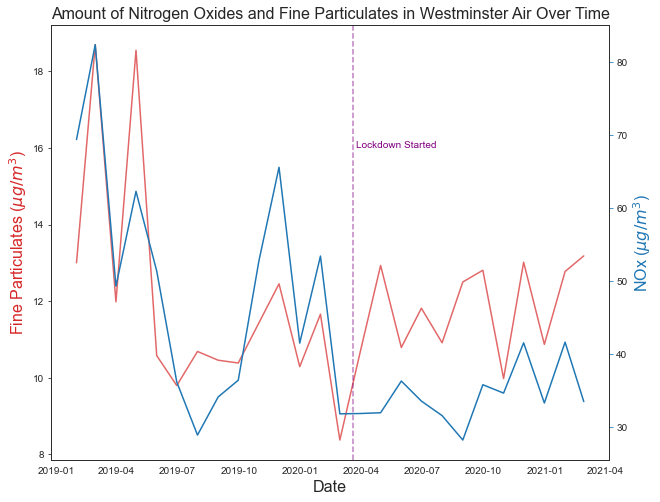

In [7]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,8))
color = 'tab:red'
#bar plot creation
ax1.set_title('Amount of Nitrogen Oxides and Fine Particulates in Westminster Air Over Time', fontsize=16)
ax1.set_xlabel(xlabel='Date', fontsize=16)
ax1.set_ylabel(ylabel='Fine Particulates ($μg/m^3$)', fontsize=16, color=color)
ax1.annotate('Lockdown Started', xy=(pd.Timestamp('2020-03-24'), 16), color='purple')
ax1 = sns.lineplot(x=air_pol.index, y='PM<sub>2.5</sub> particulate matter (Hourly measured)', data = air_pol, alpha=0.7, color=color)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
#line plot creation
ax2.set_ylabel('NOx ($μg/m^3$)', fontsize=16, color=color)
ax2 = sns.lineplot(x=air_pol.index, y='Nitrogen oxides as nitrogen dioxide', data = air_pol, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.axvline(x=pd.Timestamp('2020-03-20'), color='purple', label='Lockdown Started', ls='--', alpha=0.5)
plt.show()

So, looks like NO<sub>x</sub> did reduce with lockdown, but fine particuate levels didn't really change. 